# Infinity Mirror Test

Infinity Mirror Test for Analyzing the Robustness of Graph Generators

This notebook provides detail information to help better understand our [paper](http://arxiv.org/abs/1606.04412). We will demonstrate how we applied the *infinity mirror* test to models inferred from a real network. This code is licensed under a BSD license. See [license file](http://www.nd.edu/~saguinag/LICENSE).

In [1]:
%matplotlib inline
import os
import networkx as nx

In [2]:
# --< BEGIN >--
ds_dir =      "./datasets/"   # Directory path containing your network datasets of interest
results_dir = "./Results/" # Replace this with the directory you want to save the results
tmp_dir =     "/tmp"          # Replace this with the directory you want to save the SFrame to

## 1. Load a graph

The words network and graph are used interachangeably through out.

In [3]:
# url = "http://konect.uni-koblenz.de/downloads/tsv/as20000102.tar.bz2"
# wget http://konect.uni-koblenz.de/downloads/tsv/as20000102.tar.bz2
# tar -xjf as20000102.tar.bz2 'as20000102/out.as20000102*'
# mv as20000102/out.as20000102 datasets/
nFname = ds_dir+"out.sociopatterns-hypertext" # get file from url above
gname  = [x for x in os.path.basename(nFname).split('.') if len(x)>3][0]

graph  = nx.read_edgelist(nFname, comments='%',  nodetype=int, data=(('weight',int),('ts',int)))
graph.name=gname
print nx.info(graph)


Name: sociopatterns-hypertext
Type: Graph
Number of nodes: 113
Number of edges: 2196
Average degree:  38.8673


## 2. Learn a model using Hyperedge Replacement Grammars (HRGs)

Here we iterate 10 times by learning and growing a synthetic graph. Each time a model is learned from the last created graph. We store each 10th graph in a list. We compute network statistics on these group of graphs.

In [4]:
import PHRG.PHRG as phrg
import PHRG.probabilistic_cfg as pcfg

G = graph
Hstars = [] # synthetic (stochastically generate) graphs using the graph grammars  
ProdRulesKth =[]
for j in range(0,2): # nbr of times to feedback the resulting graph
    for k in range(0,20): # nbr of graph generations 
        # print ("\tGraph #:",k+1)
        prdrls = {}
        prod_rules = phrg.probabilistic_hrg_learning(G,prod_rules=prdrls)
        # initialize the Grammar g
        g = pcfg.Grammar('S')

        for (id, lhs, rhs, prob) in prod_rules:
            g.add_rule(pcfg.Rule(id, lhs, rhs, prob))

        num_nodes = G.number_of_nodes()
        g.set_max_size(num_nodes)

        #print "Done initializing the grammar data-structure"

        # Generate a synthetic graph using HRGs
        rule_list = g.sample(num_nodes)
        hstar = phrg.grow(rule_list, g)[0]
        G = hstar # feed back the newly created graph
    # store the last synth graph & restart     
    Hstars.append(hstar) #
        

T
100
T
100
T
100
T
100


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Degree
... Orig G
13, 1
18, 1
20, 1
22, 2
23, 4
25, 7
26, 3
27, 5
28, 6
29, 3
30, 2
31, 1
32, 5
33, 5
34, 4
35, 2
36, 2
37, 1
38, 1
39, 2
40, 4
41, 1
42, 3
43, 4
45, 1
46, 1
47, 3
49, 1
50, 4
51, 1
52, 3
53, 4
54, 3
55, 1
56, 2
57, 6
58, 3
59, 3
62, 2
63, 1
64, 1
65, 1
67, 1
69, 1

... HRG G
1	2.000
11	1.000
13	1.500
14	1.000
15	1.000
17	2.000
18	1.000
20	1.500
22	2.000
23	3.000
25	4.000
26	3.000
27	3.500
28	4.000
29	2.500
30	2.000
31	1.500
32	3.000
33	4.500
34	3.000
35	1.500
36	1.500
37	1.500
38	1.500
39	2.500
40	2.500
41	1.500
42	3.000
43	4.500
44	7.000
45	1.500
46	4.500
47	3.500
48	5.000
49	2.000
50	3.500
51	2.500
52	3.000
53	3.000
54	4.500
55	1.500
56	2.000
57	5.000
58	3.000
59	2.500
60	2.000
62	2.000
63	1.000
64	1.000
65	1.000
66	1.000
67	1.000
69	1.000
7
Hops
... Orig G
0    38.25
1    73.75
2     0.00

... Synth G
0    39.525
1    71.700
2     0.775
3     0.000
Output:  /tmp/outfig_sociopatterns-hypertext.pdf


True

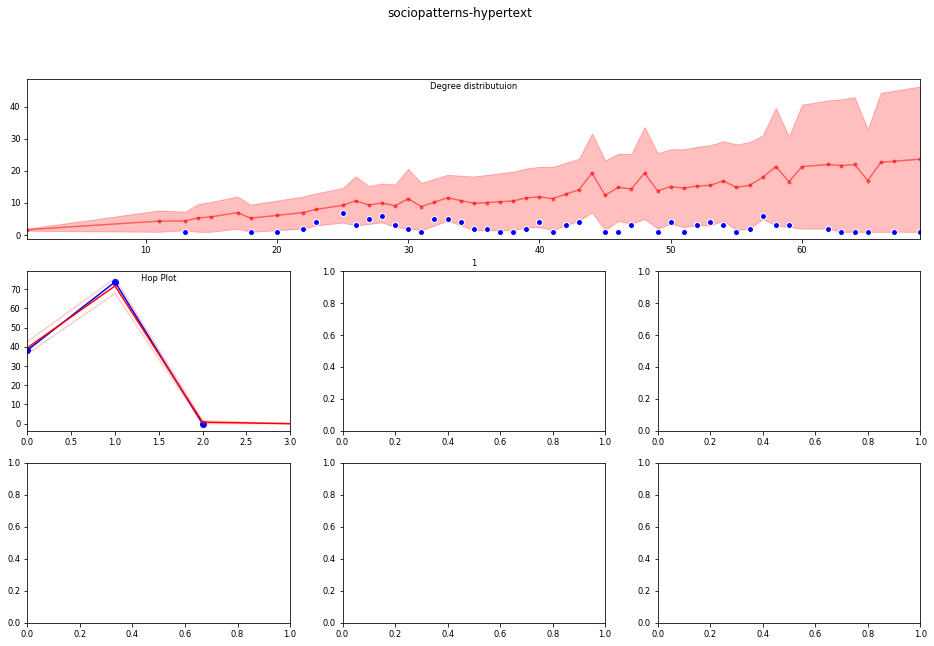

In [5]:
import matplotlib.pyplot as plt 
import net_metrics as metrics

# Compute network property statistics and compare them to those of the original graph
net_properties = [ 'degree','hops', 'clust', 'assort', 'kcore','eigen','gcd'] # list of available metrics
net_properties = [ 'degree','hops']
metrics.network_properties( [G], net_properties, Hstars, name=gname)
# plt.show()#savefig('/tmp/outfig', bb_inches='tight')

In [ ]:
plt.show()

In [2]:
import tarfile
from urllib.request import urlopen


url = "http://konect.uni-koblenz.de/downloads/tsv/flickrEdges.tar.bz2"
filename = '/tmp/temp.file'  
req = urlopen(url)
CHUNK = 16 * 1024

decompressor = bz2.BZ2Decompressor()
with open(filename, 'wb') as fp:
    while True:
        chunk = req.read(CHUNK)
        if not chunk:
            break
        fp.write(decompressor.decompress(chunk))
req.close()

ImportError: No module named request

In [16]:
# Example, compatible with both Python2 and Python3:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    
from urllib.request import urlopen
import sys
import os
import bz2
from bz2 import decompress

# Get zip file from website
# url = "http://www.7-zip.org/a/7z920.tar.bz2"  # just an example bz2 file
url = "http://konect.uni-koblenz.de/downloads/tsv/flickrEdges.tar.bz2"

archive = StringIO()

# in case the request fails (e.g. 404, 500), this will raise
# a `urllib2.HTTPError`
url_data = urlopen(url)

archive.write(url_data.read().decode("utf-8"))

# will print how much compressed data you have buffered.
print ("Length of file:", archive.tell())

# important!... make sure to reset the file descriptor read position
# to the start of the file.
# archive.seek(0)

# # Extract the training data
# data = bz2.decompress(archive.read())

# # Write to csv
# output_file = open('output_file', 'w')
# output_file.write(data)
# # filename = os.path.basename(filepath)
# newfilepath = os.path.join(tmp_dir, filename + '.decompressed')
# with open(newfilepath, 'wb') as new_file, bz2.BZ2File(filepath, 'rb') as file:
#     for data in iter(lambda : file.read(100 * 1024), b''):
#         new_file.write(data)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 10: invalid start byte

## The BTER model

We use the work provided by Tamara Kolda and her group, [BTER Guide: How to create a BTER graph that matches an existing graph](http://www.sandia.gov/~tgkolda/feastpack/doc_bter_match.html). The only difference is that we work with edgelist files (in `.txt` format).  This code is in the `Matlab` folder. We can infer a graph that matches the original in `oneoffbter.m`. Moreover, `infmir_bter.m` will do this over a series of recurrences where the output are graphs corresponding to the recurrence number.


In [2]:
def graph_model_inducer_hrgs(G, iths = 1, avgs=1):
    ''' graph model inducer: HRGs
    '''
    
    return

def graph_model_inducer_chung_lu(G):
    ''' graph model inducer: Chung Lu
    '''
    
    return

def graph_model_inducer_bter(gname):
    ''' graph model inducer: BTER
    This relies on the Matlab code provided in this </> sample
    param:   gname the graph name will help us fetch the files generated
             from the Matlab BTER code.
    returns: list of graph (nx) objects
    '''
    import glob
    bter_graphs = []
    files = glob.glob("./datasets/bter_"+gname+"*.tsv")
    for f in files:
        try: 
            bter_graphs.append(nx.read_edgelist(f))
        except Exception, e:
            print str(e)
    
    return bter_graphs

def graph_model_inducer_kron(G,gname, iths = 1, avgs=1):
    ''' Graph model inducer: Kronecker Product
    returns: list of graphs 
    '''
    import hrgs.salPHRG as hrgs
    kron_graphs = []
    for n in range(avgs): # TODO: avgs is not being handle correctly!!
        kp = hrgs.grow_graphs_using_krongen(G,gname,iths)
        kron_graphs.append(kp)
    return kron_graphs

def learn_network_model(graph, graph_name, graph_generator, itrs=1):
    ''' Learn network model 
    param: graph is the input graph (networkx obj)
    param: graph_name (str obj)
    param: graph_generator (str obj)
    param: itrs nbr of iterations 
    returns: theta graph model
    '''
    graphlst = None
    if graph_generator is 'chlu':
        graph_model_inducer_chung_lu(graph)
    elif graph_generator is 'kron': 
        graphlst = graph_model_inducer_kron(graph, graph_name, iths=itrs)
    elif graph_generator is 'bter':
        graph_model_inducer_bter(graph, graph_name)
    elif graph_generator is 'hrgs':
        graph_model_inducer_hrgs(graph, graph_name)
    else:
        return

    return graphlst    

   

In [3]:
# ---< begin >---
# Processing each of the input files
genmodels = ['kron']
for f in  input_networks_edgelist(base_dir):
    if 'karate' not in f:
        continue
    
    print("Reading edgelist file: %s " % f)
    G = load_network(f)
    # print nx.info(G)
    # print nx.average_degree_connectivity(G)
    gname = os.path.basename(f).split('.')[0].lower()
    for ggen in genmodels:
        graphs_lst = learn_network_model(G,gname,graph_generator=ggen, itrs=10) 
        if graphs_lst is not None:
            print '~'*20,'\n',(nx.average_degree_connectivity( graphs_lst[0]))
            print nx.info(graphs_lst[0])
            print 'vs'
            
            print nx.average_degree_connectivity(G)
            print nx.info(G)
            
    break
 

Reading edgelist file: ./datasets/karate.txt 
k: 6 n 34
/tmp/outfig75
k: 6 n 47
/tmp/outfig76
k: 6 n 47
/tmp/outfig77
k: 6 n 46
/tmp/outfig78
k: 6 n 49
/tmp/outfig79
k: 6 n 42
/tmp/outfig80
k: 6 n 40
/tmp/outfig81
k: 6 n 35
/tmp/outfig82
k: 6 n 35
/tmp/outfig83
k: 6 n 40
/tmp/outfig84
~~~~~~~~~~~~~~~~~~~~ 
{1: 2.75, 2: 2.7142857142857144, 3: 2.6666666666666665, 4: 2.625, 5: 2.2, 6: 3.5}
Name: 
Type: Graph
Number of nodes: 36
Number of edges: 34
Average degree:   1.8889
vs
{1: 16.0, 2: 12.409090909090908, 3: 8.222222222222221, 4: 8.541666666666666, 5: 10.466666666666667, 6: 8.333333333333334, 9: 5.777777777777778, 10: 6.6, 12: 5.083333333333333, 16: 4.3125, 17: 3.823529411764706}
Name: 
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


:0: FutureWarning: IPython widgets are experimental and may change in the future.


Name: 
Type: Graph
Number of nodes: 1330
Number of edges: 2675
Average degree:   4.0226


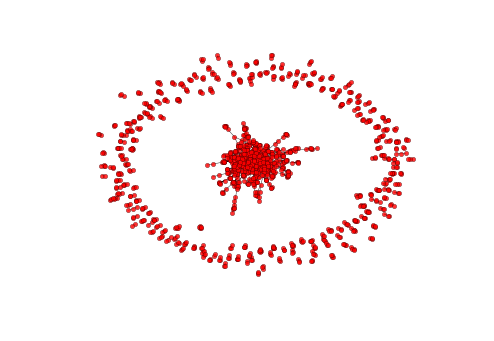

In [25]:
# BTER 
# example for dataset `netscience` bter graphs (edgelist)
import matplotlib.pyplot as plt
limits=plt.axis('off') # turn of axis

nxgraphs = graph_model_inducer_bter('netscience')
for g in nxgraphs:
    print nx.info(g)
    nx.draw_networkx(g,pos=nx.spring_layout(g), node_size=20, with_labels=False, width =0.5, alpha=0.8)   
    break